In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import os
import sys
import time

## 1. Descriptive Analysis

In [ ]:
# Export descriptions of all columns for examination
path = './vehicles.csv'
data_df = pd.read_csv(path)
data_df.head(2)

In [5]:
data_df.describe(include='all')

barrels08    barrelsA08  charge120     charge240        city08  \
count   40081.000000  40081.000000  40081.0    40081.000000  40081.000000   
unique NaN           NaN           NaN        NaN           NaN             
top    NaN           NaN           NaN        NaN           NaN             
freq   NaN           NaN           NaN        NaN           NaN             
mean    17.363564     0.220069      0.0        0.036086      18.213318      
std     4.597119      1.143270      0.0        0.534894      7.397433       
min     0.060000      0.000000      0.0        0.000000      6.000000       
25%     14.330870     0.000000      0.0        0.000000      15.000000      
50%     16.480500     0.000000      0.0        0.000000      17.000000      
75%     19.388824     0.000000      0.0        0.000000      20.000000      
max     47.087143     18.311667     0.0        12.000000     150.000000     

             city08U       cityA08      cityA08U        cityCD         cityE  \
count   40081.000000  40081.000000  40081.000000  40081.000000  40081.000000   
unique NaN           NaN           NaN           NaN           NaN             
top    NaN           NaN           NaN           NaN           NaN             
freq   NaN           NaN           NaN           NaN           NaN             
mean    5.494777      0.616077      0.466164      0.000471      0.274113       
std     11.027993     4.739349      4.563736      0.039282      3.513989       
min     0.000000      0.000000      0.000000      0.000000      0.000000       
25%     0.000000      0.000000      0.000000      0.000000      0.000000       
50%     0.000000      0.000000      0.000000      0.000000      0.000000       
75%     12.273600     0.000000      0.000000      0.000000      0.000000       
max     150.000000    145.000000    145.083500    5.350000      122.000000     

              cityUF           co2          co2A  co2TailpipeAGpm  \
count   40081.000000  40081.000000  40081.000000  40081.000000      
unique NaN           NaN           NaN           NaN                
top    NaN           NaN           NaN           NaN                
freq   NaN           NaN           NaN           NaN                
mean    0.001279      80.114069     5.713131      17.719449         
std     0.026025      169.097121    56.593602     93.570154         
min     0.000000     -1.000000     -1.000000      0.000000          
25%     0.000000     -1.000000     -1.000000      0.000000          
50%     0.000000     -1.000000     -1.000000      0.000000          
75%     0.000000     -1.000000     -1.000000      0.000000          
max     0.896000      847.000000    713.000000    713.000000        

        co2TailpipeGpm        comb08       comb08U       combA08  \
count   40081.000000    40081.000000  40081.000000  40081.000000   
unique NaN             NaN           NaN           NaN             
top    NaN             NaN           NaN           NaN             
freq   NaN             NaN           NaN           NaN             
mean    468.544572      20.461890     6.149154      0.677104       
std     122.860412      7.241669      11.763417     4.812536       
min     0.000000        7.000000      0.000000      0.000000       
25%     386.391304      17.000000     0.000000      0.000000       
50%     447.000000      20.000000     0.000000      0.000000       
75%     523.000000      23.000000     14.273000     0.000000       
max     1269.571429     136.000000    136.000000    133.000000     

            combA08U         combE    combinedCD    combinedUF     cylinders  \
count   40081.000000  40081.000000  40081.000000  40081.000000  39910.000000   
unique NaN           NaN           NaN           NaN           NaN             
top    NaN           NaN           NaN           NaN           NaN             
freq   NaN           NaN           NaN           NaN           NaN             
mean    0.504176      0.280361      0.000363      0.001261      5.721949       

### - Task 1: Ranking the most fuel eco cars

In [8]:
### insufficient 
# data_df['comb_mpg'] = data_df.apply(lambda x: x['comb08'] if x['combA08'] == 0 else x['combA08'], axis=1)
# %timeit data_df.apply(lambda x: x['comb08'] if x['combA08'] == 0 else x['combA08'], axis=1)

# see "apply", "transform" difference.

In [9]:
data_df['comb_mpg'] = data_df['combA08'] + (data_df['combA08'] == 0) * data_df['comb08']
# %timeit data_df['combA08'] + (data_df['combA08'] == 0) * data_df['comb08']

In [10]:
q1_df = data_df[['make', 'comb_mpg']].groupby(['make']).mean().reset_index(drop=False)
q1_df = q1_df.sort_values(['comb_mpg'], ascending=False).reset_index(drop=True)

In [11]:
print("Question 1: {} produces most fuel efficient fleet of cars.".format(q1_df['make'][0])) 

Question 1: Tesla produces most fuel efficient fleet of cars.


In [16]:
df[(df['a']==0) | (df['a']==1)][['c', 'd']] # where a>  df['a'].isin([])
# data_df['year'] > 1990
# pd.Series([True, False, True]) & pd.Series([False, False, True])
# [1,2,3] + [3,4,5]

### - Task 2: The fuel economy has changed over time

In [9]:
data_df['atvType'].isna().sum()

36707

In [10]:
data_df['atvType'].unique()

array([nan, 'Diesel', 'Hybrid', 'Bifuel (CNG)', 'CNG', 'FFV', 'EV',
       'Bifuel (LPG)', 'Plug-in Hybrid'], dtype=object)

In [11]:
cols = ['year',
        'make',  # manufacturers
        'atvType',  # vehicle types
        'comb08',  # combined MPG for fuelType1
        'combA08',  # combined MPG for fuelType2
        'combE',  # combined electricity consumption in kw-hrs/100 miles
        'combinedCD',  # combined gasoline consumption (gallons/100 miles) in charge depleting mode'
        ]
# Presume vacant "atvType" = Petrol-only vehicles
q2_df = data_df[cols].fillna(value={'atvType': 'Petrol'})

In [ ]:
'''
1. "Single Fuel" : atvtype = 'Petrol' / 'Diesel' / 'Hybrid' / 'CNG'
                   metric='comb08'
2. "Dual Fuel" : atvtype = 'Bifuel(CNG)' / 'FFV' / 'Bifuel(LPG)' 
                 metric='combA08', presuming this type only uses fuelType2
3. "EV" : atvtype = 'EV' 
          metric='combE', lower the better
4. "Plug-in Hybrid" : atvtype = 'Plug-in Hybrid' 
                      metric='combinedCD'
'''

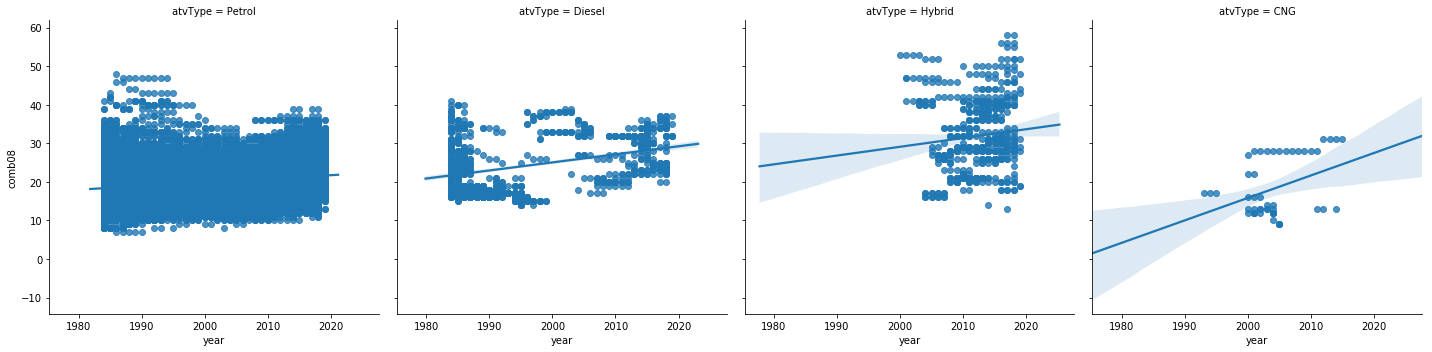

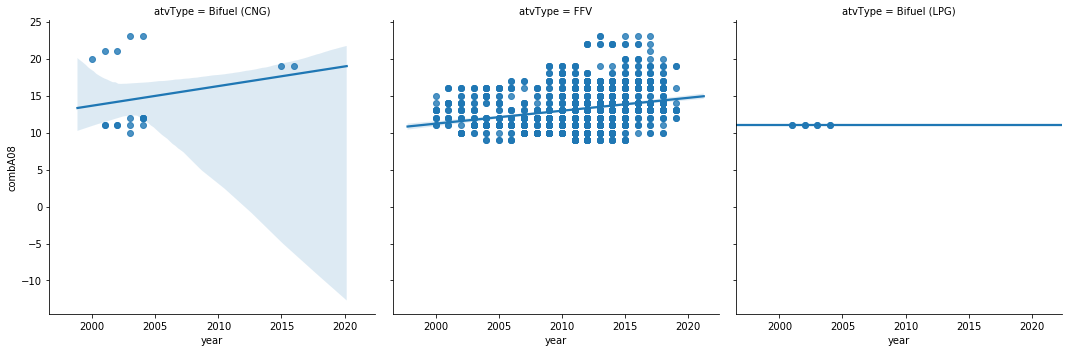

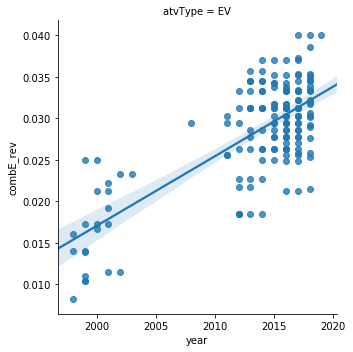

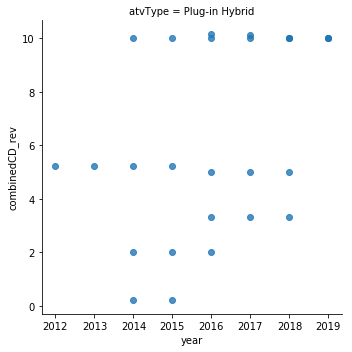

In [13]:
# STEP 1: Categorize the vehicle types and evaluate the fuel economy by diff metrics.
# - Type 1. single fuel (excluding 'EV'), metric='comb08'
filtering_metric_single_fuel = (q2_df['comb08'] > 0) & (q2_df['combA08'] == 0) & (q2_df['atvType'] != 'EV')
measurement_cols_single_fuel = ['year', 'atvType', 'comb08']
data_df_single_fuel = q2_df[filtering_metric_single_fuel][measurement_cols_single_fuel]

# - Type 2 dual fuel (exluding PHEV) - presuming this type only uses fuelType2, metric='combA08'
filtering_metric_dual_fuel = (q2_df['combA08'] > 0) & (q2_df['atvType'] != 'Plug-in Hybrid')
measurement_cols_dual_fuel = ['year', 'atvType', 'combA08']
data_df_dual_fuel = data_df[filtering_metric_dual_fuel][measurement_cols_dual_fuel]

# - Type 3 EV, only uses electricity, metric='combE'
filtering_metric_ev = (q2_df['atvType'] == 'EV')
measurement_cols_ev = ['year', 'atvType', 'combE']
data_df_ev = q2_df[filtering_metric_ev][measurement_cols_ev]
# Note that 'combE' is measured at kw-hrs/100 miles, hence lower the better.
data_df_ev['combE_rev'] = 1 / data_df_ev['combE']

# - Type 4 PHEV, presuming only runs in charge-depleting mode, metric='CombinedCD'
filtering_metric_PHEV = (q2_df['atvType'] == 'Plug-in Hybrid')
measurement_cols_PHEV = ['year', 'atvType', 'combinedCD']
data_df_PHEV = q2_df[filtering_metric_PHEV][measurement_cols_PHEV]
# Note that 'combinedCD' is measured at gallons/100 miles, hence lower the better.
data_df_PHEV['combinedCD_rev'] = 1 / data_df_PHEV['combinedCD']

# STEP 2: Plotting
# Plot the fuel economy trend for each type.
plot1 = sns.lmplot(x='year', y='comb08', data=data_df_single_fuel, col='atvType')
plot1.savefig('Q2_single_fuel.png')
plot2 = sns.lmplot(x='year', y='combA08', data=data_df_dual_fuel, col='atvType')
plot2.savefig('Q2_dual_fuel.png')
plot3 = sns.lmplot(x='year', y='combE_rev', data=data_df_ev, col='atvType')
plot3.savefig('Q2_ev_fuel.png')
plot4 = sns.lmplot(x='year', y='combinedCD_rev', data=data_df_PHEV, col='atvType')
plot4.savefig('Q2_PHEV_fuel.png')
plt.show()

In [ ]:
# T2 main function
def plot_fuel_economy_for_all_atvtypes(df):
    cols = ['year',
            'make',  # manufacturers
            'atvType',  # vehicle types
            'comb08',  # combined MPG for fuelType1
            'combA08',  # combined MPG for fuelType2
            'combE',  # combined electricity consumption in kw-hrs/100 miles
            'combinedCD',  # combined gasoline consumption (gallons/100 miles) in charge depleting mode'
            ]
    # Presume vacant "atvType" = Petrol-only vehicles
    df = df[cols].fillna(value={'atvType': 'Petrol'})

    # STEP 1: Categorize the vehicle types and evaluate the fuel economy by diff metrics.
    # - Type 1. single fuel (excluding 'EV'), metric='comb08'
    filtering_metric_single_fuel = (df['comb08'] > 0) & (df['combA08'] == 0) & (df['atvType'] != 'EV')
    measurement_cols_single_fuel = ['year', 'atvType', 'comb08']
    data_df_single_fuel = df[filtering_metric_single_fuel][measurement_cols_single_fuel]

    # - Type 2 dual fuel (exluding PHEV) - presuming this type only uses fuelType2, metric='combA08'
    filtering_metric_dual_fuel = (data_df['combA08'] > 0) & (data_df['atvType'] != 'Plug-in Hybrid')
    measurement_cols_dual_fuel = ['year', 'atvType', 'combA08']
    data_df_dual_fuel = data_df[filtering_metric_dual_fuel][measurement_cols_dual_fuel]

    # - Type 3 EV, only uses electricity, metric='combE'
    filtering_metric_ev = (data_df['atvType'] == 'EV')
    measurement_cols_ev = ['year', 'atvType', 'combE']
    data_df_ev = data_df[filtering_metric_ev][measurement_cols_ev]
    # Note that 'combE' is measured at kw-hrs/100 miles, hence lower the better.
    data_df_ev['combE_rev'] = 1 / data_df_ev['combE']

    # - Type 4 PHEV, presuming only runs in charge-depleting mode, metric='CombinedCD'
    filtering_metric_PHEV = (data_df['atvType'] == 'Plug-in Hybrid')
    measurement_cols_PHEV = ['year', 'atvType', 'combinedCD']
    data_df_PHEV = data_df[filtering_metric_PHEV][measurement_cols_PHEV]
    # Note that 'combinedCD' is measured at gallons/100 miles, hence lower the better.
    data_df_PHEV['combinedCD_rev'] = 1 / data_df_PHEV['combinedCD']

    # STEP 2: Plotting
    # Plot the fuel economy trend for each type.
    plot1 = sns.lmplot(x='year', y='comb08', data=data_df_single_fuel, col='atvType')
    plot1.savefig('Q2_single_fuel.png')
    plot2 = sns.lmplot(x='year', y='combA08', data=data_df_dual_fuel, col='atvType')
    plot2.savefig('Q2_dual_fuel.png')
    plot3 = sns.lmplot(x='year', y='combE_rev', data=data_df_ev, col='atvType')
    plot3.savefig('Q2_ev_fuel.png')
    plot4 = sns.lmplot(x='year', y='combinedCD_rev', data=data_df_PHEV, col='atvType')
    plot4.savefig('Q2_PHEV_fuel.png')
    plt.show()

### - Task3: Production percentage of "fuel economy" models of each manufacturer changes over years

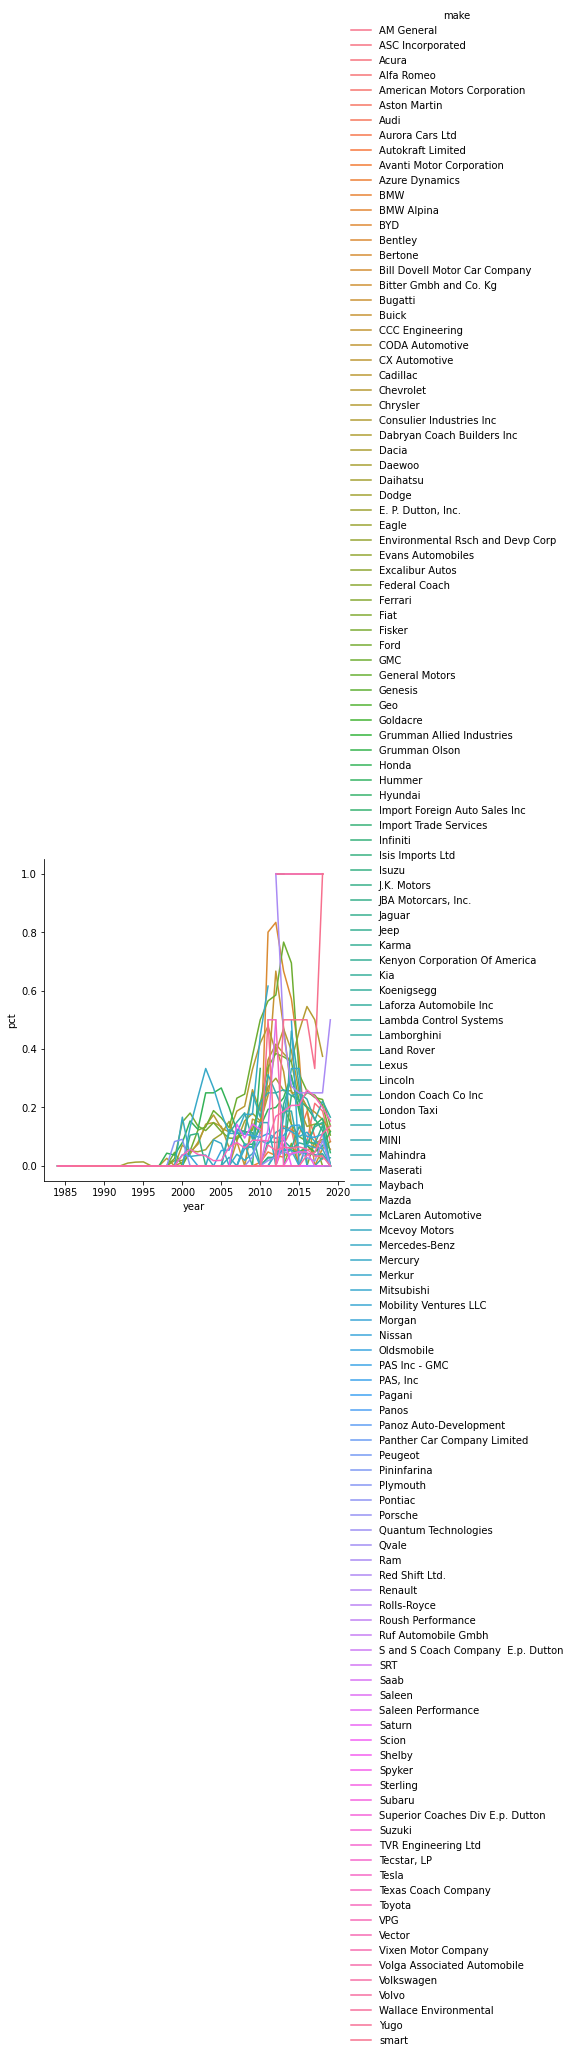

In [22]:
fuel_economy_atvtype_list = [
    'Hybrid', 'Bifuel (CNG)', 'CNG', 'FFV', 'EV', 'Bifuel (LPG)', 'Plug-in Hybrid']

q3_df = data_df[['year', 'make', 'model', 'atvType']]
q3_df = q3_df.fillna(value={'atvType': 'Petrol'})

def cal_pct_of_fe_models_per_manufacturer(df):
    return df['atvType'].isin(fuel_economy_atvtype_list).sum() / len(df['atvType'])

q3_ser = q3_df.groupby(['make', 'year']).apply(cal_pct_of_fe_models_per_manufacturer)
# q3_df
# print(type(q3_df))
q3_df = q3_ser.reset_index()
# q3_df.head()
q3_df = q3_df.rename(columns={0: 'pct'})

sns_plot = sns.relplot(x="year", y="pct", kind="line", hue='make', data=q3_df)
plt.show()
sns_plot.savefig("Q3.png")

In [ ]:
# Q3 question main function
def plot_evolution_of_manufacturer(df):
    fuel_economy_atvtype_list = [
        'Hybrid', 'Bifuel (CNG)', 'CNG', 'FFV', 'EV', 'Bifuel (LPG)', 'Plug-in Hybrid']

    df = df[['year', 'make', 'model', 'atvType']]
    df = df.fillna(value={'atvType': 'Petrol'})

    def cal_pct_of_fe_models_per_manufacturer(df):
        return df['atvType'].isin(fuel_economy_atvtype_list).sum() / len(df['atvType'])

    df = df.groupby(['make', 'year']).apply(cal_pct_of_fe_models_per_manufacturer)
    df = df.reset_index()
    df = df.rename(columns={0: 'pct'})

    sns_plot = sns.relplot(x="year", y="pct", kind="line", hue='make', data=df)
    plt.show()
    sns_plot.savefig("side_question.png")

    return df